# Lab 7.1 - Building a classifier

In this lab, you will download a set of free drum sounds available from [https://www.mediafire.com/file/7q81baqf23ybz7x/dubstep_empire_drum_kit.zip/file](https://www.mediafire.com/file/7q81baqf23ybz7x/dubstep_empire_drum_kit.zip/file) and build a classifier.

#### Problem 1 - Download and extract the drums sounds from the link provided above.

In [29]:
%matplotlib inline
from pathlib import Path
import numpy as np, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import pandas as pd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (15, 5) # Set default plot size
import seaborn as sns

#### Problem 2 - Load the Snares and Kicks tracks and extract features.

Be sure to extract at least four features, which might include [Energy and RMSE](https://musicinformationretrieval.com/energy.html), [Zero Crossing Rate](https://musicinformationretrieval.com/zcr.html) and/or any of the [spectral features](https://musicinformationretrieval.com/spectral_features.html)

In [42]:
snare_signals = [
    librosa.load(p)[0] for p in Path().glob('Dubstep Empire Drum Kit/Snares/Snare*.wav')
]

kick_signals = [
    librosa.load(p)[0] for p in Path().glob('Dubstep Empire Drum Kit/Kicks/Kick*.wav')
]


In [64]:
len(snare_signals)

415

In [43]:
len(kick_signals)

503

In [48]:
kick_signals = kick_signals[:415]

In [63]:
len(kick_signals)

415

#### Problem 3 - Make plots of the feature space

Before building the classifier, you should make various plots of the feature space using [Seaborn pairplot](https://pythonbasics.org/seaborn-pairplot/)

In [36]:
dir(librosa.feature)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'delta',
 'fourier_tempogram',
 'inverse',
 'melspectrogram',
 'mfcc',
 'poly_features',
 'rhythm',
 'rms',
 'spectral',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_flatness',
 'spectral_rolloff',
 'stack_memory',
 'tempogram',
 'tonnetz',
 'utils',
 'zero_crossing_rate']

In [66]:
def extract_features(signal):
    return (
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
        librosa.feature.rms(signal)[0, 0]
    
    )

In [67]:
kick_zcr, kick_spec_cent, kick_rms = zip(*np.array([extract_features(x) for x in kick_signals]))
snare_zcr, snare_spec_cent,snare rms = zip(*np.array([extract_features(x) for x in snare_signals]))

In [74]:
drum_samples = pd.DataFrame({'type': 415*['kick'] + 415*['snare']
                           ,'zcr' : np.concatenate((kick_zcr, snare_zcr))
                           ,'spec_cent' : np.concatenate((kick_spec_cent, snare_spec_cent))
                            ,'RMS' : np.concatenate((kick_rms, snare_rms))
                           })
drum_samples

,type,zcr,spec_cent,RMS
0,kick,0.010254,1928.195237,0.231264
1,kick,0.006836,1493.914404,0.626715
2,kick,0.007324,416.690144,0.761227
3,kick,0.013184,1330.512116,0.495965
4,kick,0.008789,1813.620698,0.512647
...,...,...,...,...
825,snare,0.161621,4440.743586,0.252848
826,snare,0.119141,3933.728437,0.223862
827,snare,0.107910,3150.946117,0.233570
828,snare,0.145996,4238.211723,0.155740


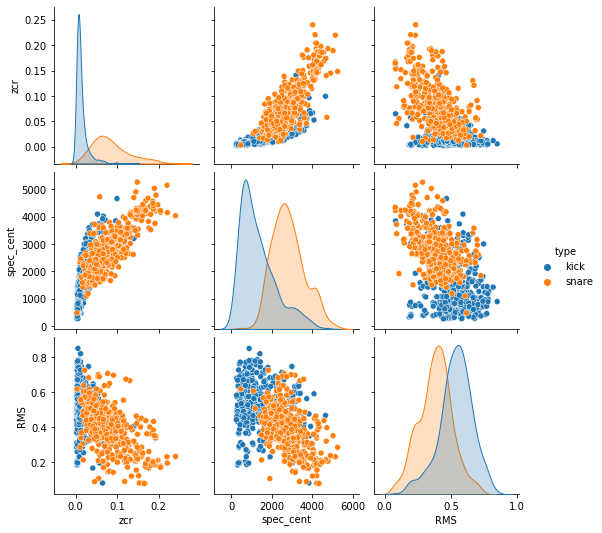

In [75]:
sns.pairplot(drum_samples, hue="type")

In [76]:
drum_samples[["zcr", "spec_cent",'RMS']].describe()

,zcr,spec_cent,RMS
count,830.000000,830.000000,830.000000
mean,0.048966,2075.878679,0.458008
std,0.048367,1125.995321,0.146611
min,0.002930,262.916896,0.079577
25%,0.008301,1086.834340,0.362456
50%,0.031494,2075.778954,0.463854
75%,0.076538,2891.732615,0.563239
max,0.240234,5258.701625,0.849207


In [77]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
drum_samples[['zcr', 'spec_cent','RMS']] = scaler.fit_transform(drum_samples[['zcr', 'spec_cent','RMS']])

In [79]:
drum_samples[["zcr", "spec_cent",'RMS']].describe()

,zcr,spec_cent,RMS
count,830.000000,830.000000,830.000000
mean,-0.612009,-0.274203,-0.016590
std,0.407636,0.450778,0.380991
min,-1.000000,-1.000000,-1.000000
25%,-0.954733,-0.670155,-0.264896
50%,-0.759259,-0.274243,-0.001399
75%,-0.379630,0.052414,0.256869
max,1.000000,1.000000,1.000000


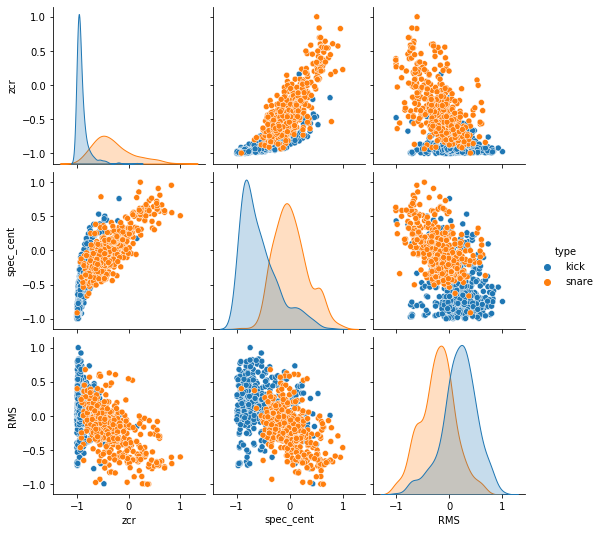

In [80]:
sns.pairplot(drum_samples, hue="type")

#### Problem 4 - Train and Validate a Classifier

You can use any classifier that you prefer, from logistic regression (as seen in STAT 310 and Lecture 7.3) or other classifiers that you might have learned about in DSCI 425.

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

data_train, data_test, labels_train, labels_test = train_test_split(drum_samples[["zcr", "spec_cent",'RMS']],drum_samples.type, test_size=0.3)

In [82]:
LRC = LogisticRegression()
LRC.fit(data_train, labels_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
predicted_values = LRC.predict(data_test)
predicted_values

array(['snare', 'snare', 'kick', 'kick', 'kick', 'kick', 'snare', 'kick',
       'snare', 'kick', 'snare', 'kick', 'kick', 'snare', 'snare', 'kick',
       'kick', 'snare', 'kick', 'snare', 'kick', 'snare', 'snare',
       'snare', 'snare', 'snare', 'snare', 'kick', 'kick', 'snare',
       'kick', 'kick', 'kick', 'snare', 'kick', 'kick', 'snare', 'snare',
       'snare', 'kick', 'snare', 'kick', 'kick', 'snare', 'kick', 'snare',
       'kick', 'snare', 'snare', 'kick', 'kick', 'snare', 'snare',
       'snare', 'kick', 'kick', 'snare', 'snare', 'snare', 'snare',
       'snare', 'snare', 'kick', 'kick', 'kick', 'kick', 'kick', 'kick',
       'kick', 'snare', 'snare', 'snare', 'snare', 'kick', 'snare',
       'kick', 'snare', 'kick', 'kick', 'kick', 'snare', 'kick', 'snare',
       'kick', 'snare', 'kick', 'kick', 'kick', 'snare', 'kick', 'kick',
       'kick', 'snare', 'snare', 'snare', 'kick', 'kick', 'snare', 'kick',
       'snare', 'kick', 'snare', 'kick', 'snare', 'kick', 'snare', 'k

In [90]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

print(classification_report(labels_test, predicted_values))

              precision    recall  f1-score   support

        kick       0.91      0.92      0.91       132
       snare       0.91      0.90      0.90       117

    accuracy                           0.91       249
   macro avg       0.91      0.91      0.91       249
weighted avg       0.91      0.91      0.91       249



In [102]:
cm= confusion_matrix(labels_test, predicted_values)
cm

array([[121,  11],
       [ 12, 105]])

In [105]:
cm.display = ConfusionMatrixDisplay(cm).plot()
cm.display

TypeError: __init__() missing 1 required positional argument: 'display_labels'

In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = LRC.decision_function(data_test)

fpr, tpr, _ = roc_curve(data_test, y_score, pos_label=LRC.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


ValueError: continuous-multioutput format is not supported